In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
from google.colab import drive          #Leer de drive (opcional)
drive.mount('/content/drive')

Mounted at /content/drive


## Data de entrenamiento

In [ ]:
ruta_fotos = '/content/drive/My Drive/Algebra tim/Entrega Final/trainingset'   #Ruta de la carpeta fotos
#ruta_fotos="C:\Users\Carlos\Desktop\ALGEBRA FOTOS\trainingset"

In [3]:
tamano = (100, 100)
reniec = cv2.imread("foto_46.jpg", cv2.IMREAD_GRAYSCALE)
reniec = cv2.resize(reniec, tamano)

Se necesitan imagenes suficientes para calcular valores propios (SVD) o componentes principales (PCA).
Por ello se generan 30 imagenes con diferentes niveles de brillo y exposicion para generar una variacion suficiente que permita al programa reconocer los rasgos faciales de la persona (Turk, Pentland 1991)


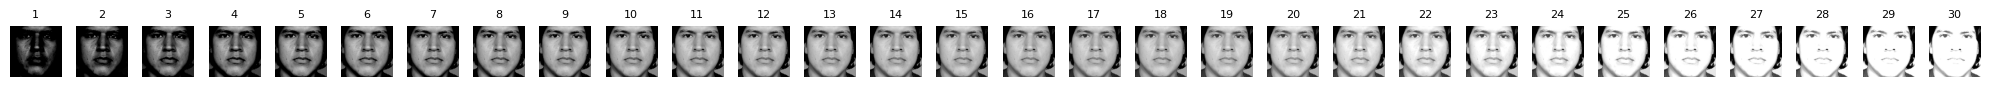

In [4]:
#Creacion de imagenes necesarias


# Pasar img a float32
img = reniec.astype(np.float32)

# Rango de contraste (alpha): leve variación, sin exagerar
alphas = np.linspace(0.6, 1.4, 30)  # Contraste: de bajo a alto

# Rango de brillo (beta): sin llegar a extremos absolutos
betas = np.linspace(-100, 60, 30)    # Brillo: de oscuro a claro

plt.figure(figsize=(20, 4))

data_matrix = []  # Lista para almacenar vectores de imágenes

for i, (a, b) in enumerate(zip(alphas, betas)):
    # Aplicar transformación lineal
    img_mod = np.clip(a * img + b, 0, 255).astype(np.uint8)

    # Aplanar la imagen y guardarla en la lista
    img_vector = img_mod.flatten()
    data_matrix.append(img_vector)

    # Mostrar
    plt.subplot(1, 30, i + 1)
    plt.imshow(img_mod, cmap='gray')
    plt.title(f'{i+1}', fontsize=8)
    plt.axis('off')


plt.tight_layout()
plt.show()

In [5]:
# Crear la matriz X
X = np.array(data_matrix)
print(f"Shape X: {X.shape}")
X_mean = np.mean(X, axis=0)
X_centered = X - X_mean

Shape X: (30, 10000)


## Data test

In [8]:
ruta_fotos = '/content/drive/My Drive/Algebra tim/Entrega Final/TestSet'   #Ruta de la carpeta fotos
#ruta_fotos="C:\Users\Carlos\Desktop\ALGEBRA FOTOS\trainingset"

In [9]:
data_matrix = []
labels = []

nombres_imagenes = sorted([
    f for f in os.listdir(ruta_fotos)
    if f.lower().endswith(('.jpg', '.jpeg', '.png'))
])

for nombre in nombres_imagenes:
    path = os.path.join(ruta_fotos, nombre)
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

    if img is None:
        print(f"No se pudo leer: {nombre}")
        continue

    img = cv2.resize(img, tamano)
    img_vector = img.flatten().astype(np.float32)

    data_matrix.append(img_vector)

    # Etiquetas automáticas según el nombre
    if nombre.startswith('carlos'):
        labels.append('carlos')
    elif nombre.startswith('papa'):
        labels.append('papa')
    elif nombre.startswith('paula'):
        labels.append('paula')
    elif nombre.startswith('dani'):
        labels.append('dani')
    elif nombre.startswith('luna'):
        labels.append('luna')
    elif nombre.startswith('persona'):
        labels.append('persona')
    else:
        labels.append('desconocido')

# Convertir a array
xtest = np.array(data_matrix)
xtest_mean = np.mean(xtest, axis=0)
xtest_centered = xtest - xtest_mean

print(f"Shape X: {xtest.shape}")

Shape X: (10, 10000)


## Visualizacion

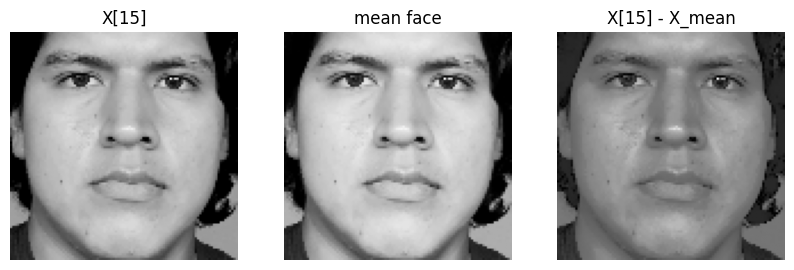

In [12]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(X[15].reshape((100, 100)), cmap='gray')
plt.title('X[15]')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(X_mean.reshape((100, 100)), cmap='gray')
plt.title('mean face')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(X_centered[15].reshape((100, 100)), cmap='gray')
plt.title('X[15] - X_mean')
plt.axis('off')

plt.show()


Al usar X_centered, las componentes principales (Eigenfaces) pueden capturan patrones de variación, no información redundante o promedio.

In [13]:
def mostrar_lado_a_lado_sin_titulos(img1, img2, figsize=(6, 3)):

    fig, axs = plt.subplots(1, 2, figsize=figsize)

    axs[0].imshow(img1, cmap='gray')
    axs[0].axis('off')

    axs[1].imshow(img2, cmap='gray')
    axs[1].axis('off')

    plt.tight_layout()
    plt.show()

# SVD

Se necesitan imagenes suficientes para calcular valores propios (SVD) o componentes principales (PCA).
Por ello se utilizan 60 imagenes con diferentes niveles de brillo y exposicion para generar una variacion suficiente que permita al programa reconocer los rasgos faciales de la persona (Turk, Pentland 1991)


In [14]:
#-------------- Aplicar SVD ---------------------
U, S, Vt = np.linalg.svd(X_centered, full_matrices=False)

print("Formas de U, S, Vt:")
print("U:", U.shape)
print("S:", S.shape)
print("Vt:", Vt.shape)

Formas de U, S, Vt:
U: (30, 30)
S: (30,)
Vt: (30, 10000)


* Vectores de Vt orresponden a las direcciones principales de los datos.

* En imágenes, esas direcciones se llaman Eigenfaces, porque al reestructurarlos en forma de imagen, representan patrones base que explican variación entre rostros

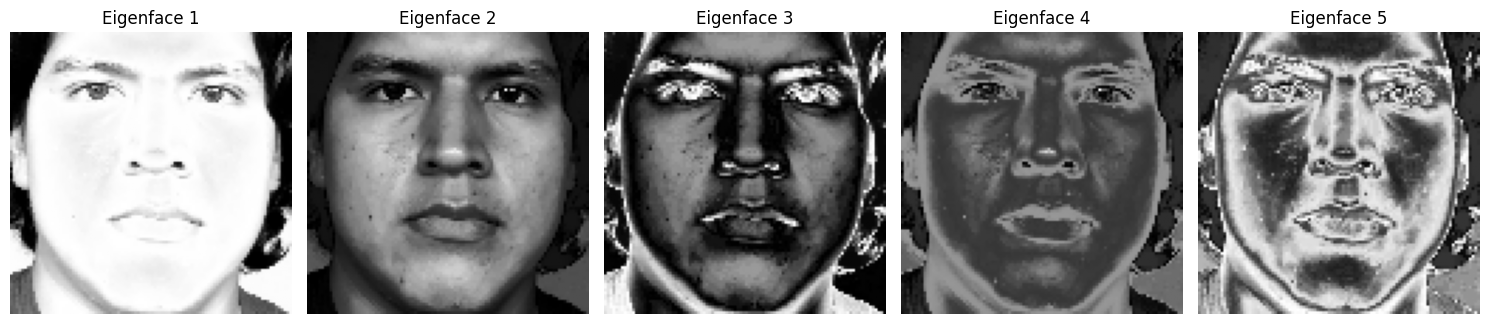

In [15]:
# Cantidad de eigenfaces a mostrar
k = 5
# Crear figura con 1 fila y k columnas
fig, axes = plt.subplots(1, k, figsize=(15, 4))

for i in range(k):
    eigenface = Vt[i].reshape(100, 100)  # Ajusta según tamaño real
    axes[i].imshow(eigenface, cmap='gray')
    axes[i].set_title(f'Eigenface {i+1}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

Cada Eigenface es un "patrón base" que, combinado linealmente, puede reconstruir cualquier cara del conjunto.

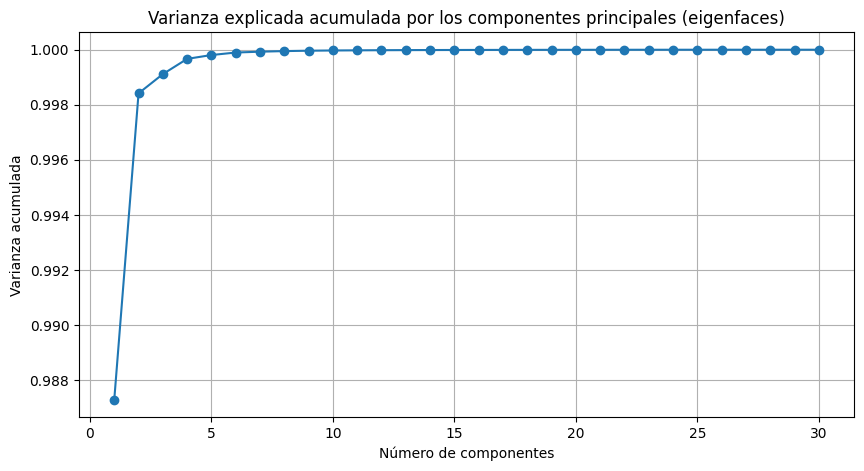

Componente  1:  Varianza = 0.987288   Acumulada = 0.987288
Componente  2:  Varianza = 0.011127   Acumulada = 0.998416
Componente  3:  Varianza = 0.000699   Acumulada = 0.999114
Componente  4:  Varianza = 0.000554   Acumulada = 0.999668
Componente  5:  Varianza = 0.000139   Acumulada = 0.999807


In [16]:
# Cuadrados de los valores singulares
varianzas = S**2

# Proporción de varianza explicada por cada componente
var_explicada = varianzas / np.sum(varianzas)

# Varianza acumulada (para saber cuántos necesitas para llegar al 90%, por ejemplo)
var_acumulada = np.cumsum(var_explicada)

plt.figure(figsize=(10, 5))
plt.plot(np.arange(1, len(S)+1), var_acumulada, marker='o')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza acumulada')
plt.title('Varianza explicada acumulada por los componentes principales (eigenfaces)')
plt.grid(True)
plt.show()

# Mostrar las primeras 10 varianzas explicadas con más precisión
for i in range(5):
    print(f"Componente {i+1:2d}:  Varianza = {var_explicada[i]:.6f}   Acumulada = {var_acumulada[i]:.6f}")


# Pruebas SVD:

In [17]:
def comparar_con_svd(img1, img2, X_mean, Vt, k=5, umbral=3500):

    vec_1 = img1.flatten().astype(np.float32) - X_mean
    vec_2 = img2.flatten().astype(np.float32) - X_mean

    firma_1 = vec_1 @ Vt[:k].T
    firma_2 = vec_2 @ Vt[:k].T

    distancia = np.linalg.norm(firma_1 - firma_2)
    print(f"Distancia (SVD, k={k}): {distancia:.2f}")

    if distancia < umbral:
        mensaje = "✅ Probablemente la MISMA persona"
    else:
        mensaje = "❌ Probablemente NO es la misma persona"

    print(mensaje)
    return distancia, mensaje


Comparando xtest[0] vs X[15]:
Distancia (SVD, k=5): 2717.35
✅ Probablemente la MISMA persona


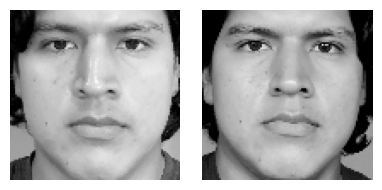


Comparando xtest[1] vs X[15]:
Distancia (SVD, k=5): 2282.83
✅ Probablemente la MISMA persona


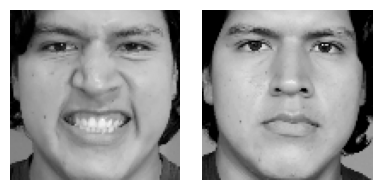


Comparando xtest[2] vs X[15]:
Distancia (SVD, k=5): 2194.60
✅ Probablemente la MISMA persona


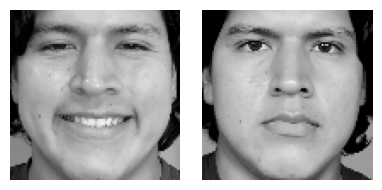


Comparando xtest[3] vs X[15]:
Distancia (SVD, k=5): 1920.71
✅ Probablemente la MISMA persona


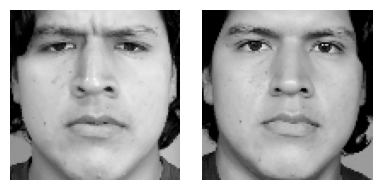


Comparando xtest[4] vs X[15]:
Distancia (SVD, k=5): 2003.11
✅ Probablemente la MISMA persona


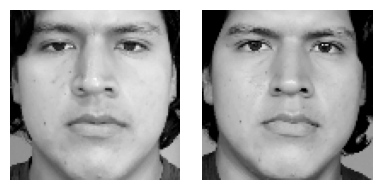


Comparando xtest[5] vs X[15]:
Distancia (SVD, k=5): 3245.33
✅ Probablemente la MISMA persona


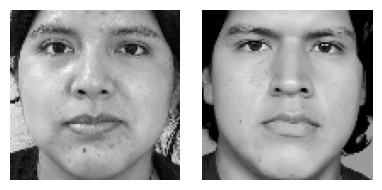


Comparando xtest[6] vs X[15]:
Distancia (SVD, k=5): 5796.18
❌ Probablemente NO es la misma persona


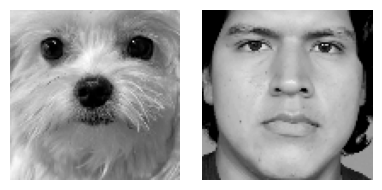


Comparando xtest[7] vs X[15]:
Distancia (SVD, k=5): 5546.60
❌ Probablemente NO es la misma persona


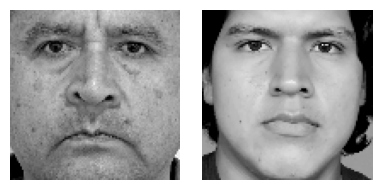


Comparando xtest[8] vs X[15]:
Distancia (SVD, k=5): 3150.67
✅ Probablemente la MISMA persona


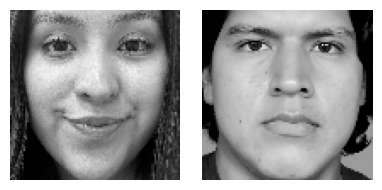


Comparando xtest[9] vs X[15]:
Distancia (SVD, k=5): 4198.75
❌ Probablemente NO es la misma persona


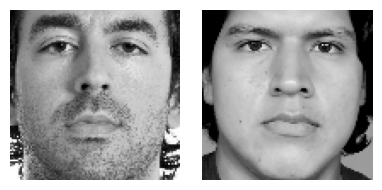

In [20]:
for i in range(10):
    print(f"\nComparando xtest[{i}] vs X[15]:")

    distancia, mensaje = comparar_con_svd(
        xtest[i].reshape((100, 100)),
        X[15].reshape((100, 100)),
        X_mean,
        Vt,   # Aquí debe ir Vt, no pca
        k=5,
        umbral=3500
    )

    mostrar_lado_a_lado_sin_titulos(
        xtest[i].reshape((100, 100)),
        X[15].reshape((100, 100)),
        figsize=(4, 2)
    )


# PCA


In [22]:
# Entrenar PCA
k = 30  # puedes ajustar este valor
pca = PCA(n_components=k)
pca.fit(X)

PCA(n_components=30)

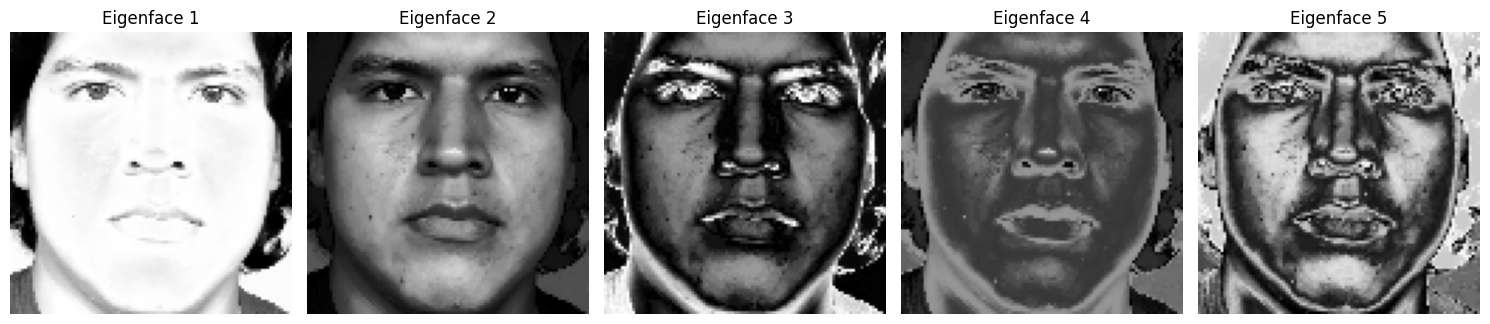

In [23]:
# Cantidad de eigenfaces a mostrar
k = 5
fig, axes = plt.subplots(1, k, figsize=(15, 4))

for i in range(k):
    eigenface = pca.components_[i].reshape(100, 100)
    axes[i].imshow(eigenface, cmap='gray')
    axes[i].set_title(f'Eigenface {i+1}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

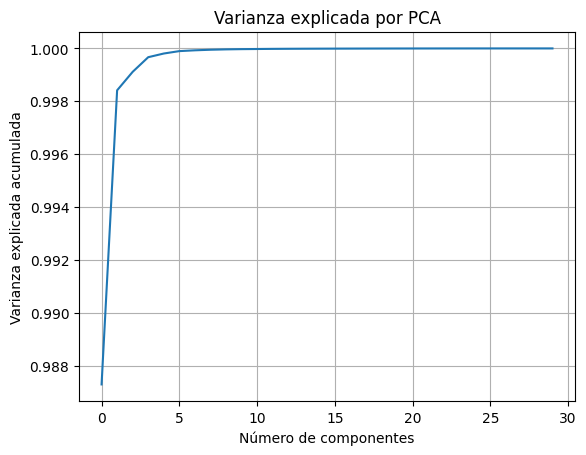

Componente  1:  Varianza = 0.987288   Acumulada = 0.987288
Componente  2:  Varianza = 0.011127   Acumulada = 0.998416
Componente  3:  Varianza = 0.000699   Acumulada = 0.999114
Componente  4:  Varianza = 0.000554   Acumulada = 0.999668
Componente  5:  Varianza = 0.000139   Acumulada = 0.999807


In [24]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Número de componentes")
plt.ylabel("Varianza explicada acumulada")
plt.title("Varianza explicada por PCA")
plt.grid(True)
plt.show()

#Mostrar las primeras 5 varianzas explicadas
for i in range(5):
  print(f"Componente {i+1:2d}:  Varianza = {pca.explained_variance_ratio_[i]:.6f}   Acumulada = {np.cumsum(pca.explained_variance_ratio_)[i]:.6f}")

In [25]:
def comparar_con_pca(img1, img2, X_mean, pca, k=5, umbral=3500):
    # Aplanar y centrar imágenes
    vec1 = img1.flatten().astype(np.float32) - X_mean
    vec2 = img2.flatten().astype(np.float32) - X_mean

    # Proyección PCA
    firma_1 = pca.transform([vec1])[0][:k]
    firma_2 = pca.transform([vec2])[0][:k]

    # Calcular distancia
    distancia = np.linalg.norm(firma_1 - firma_2)
    print(f"Distancia (PCA, k={k}): {distancia:.2f}")

    # Decisión
    if distancia < umbral:
        mensaje = "✅ Probablemente la MISMA persona"
    else:
        mensaje = "❌ Probablemente NO es la misma persona"

    print(mensaje)
    return distancia, mensaje

# Pruebas PCA


Comparando xtest[0] vs X[35]:
Distancia (PCA, k=5): 2717.35
✅ Probablemente la MISMA persona


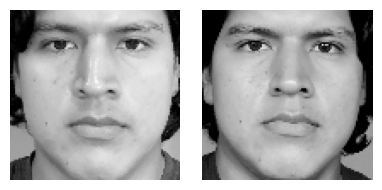


Comparando xtest[1] vs X[35]:
Distancia (PCA, k=5): 2282.83
✅ Probablemente la MISMA persona


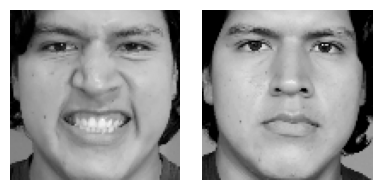


Comparando xtest[2] vs X[35]:
Distancia (PCA, k=5): 2194.60
✅ Probablemente la MISMA persona


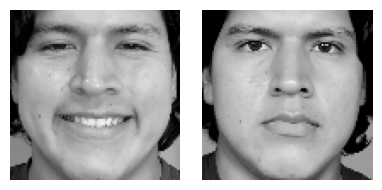


Comparando xtest[3] vs X[35]:
Distancia (PCA, k=5): 1920.71
✅ Probablemente la MISMA persona


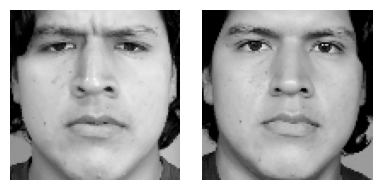


Comparando xtest[4] vs X[35]:
Distancia (PCA, k=5): 2003.11
✅ Probablemente la MISMA persona


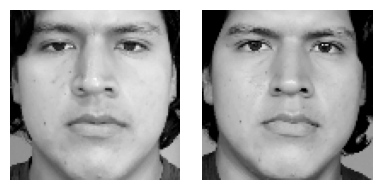


Comparando xtest[5] vs X[35]:
Distancia (PCA, k=5): 3245.33
✅ Probablemente la MISMA persona


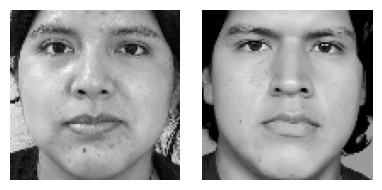


Comparando xtest[6] vs X[35]:
Distancia (PCA, k=5): 5796.18
❌ Probablemente NO es la misma persona


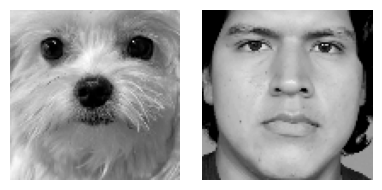


Comparando xtest[7] vs X[35]:
Distancia (PCA, k=5): 5546.60
❌ Probablemente NO es la misma persona


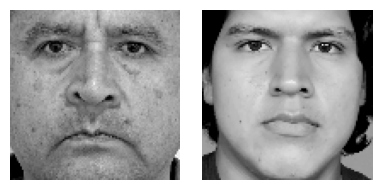


Comparando xtest[8] vs X[35]:
Distancia (PCA, k=5): 3150.67
✅ Probablemente la MISMA persona


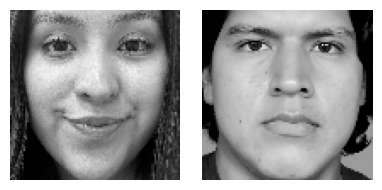


Comparando xtest[9] vs X[35]:
Distancia (PCA, k=5): 4198.75
❌ Probablemente NO es la misma persona


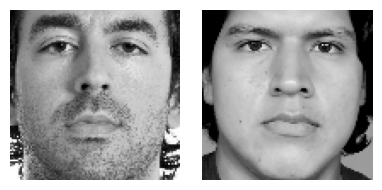

In [27]:
for i in range(10):
    print(f"\nComparando xtest[{i}] vs X[35]:")

    distancia, mensaje = comparar_con_pca(
        xtest[i].reshape((100, 100)),
        X[15].reshape((100, 100)),
        X_mean,
        pca
    )

    mostrar_lado_a_lado_sin_titulos(
        xtest[i].reshape((100, 100)),
        X[15].reshape((100, 100)),
        figsize=(4, 2)
    )

# Comparacion de modelos

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import time
import tracemalloc
import matplotlib.pyplot as plt

Distancia (SVD, k=5): 2717.35
✅ Probablemente la MISMA persona
Distancia (SVD, k=5): 2282.83
✅ Probablemente la MISMA persona
Distancia (SVD, k=5): 2194.60
✅ Probablemente la MISMA persona
Distancia (SVD, k=5): 1920.71
✅ Probablemente la MISMA persona
Distancia (SVD, k=5): 2003.11
✅ Probablemente la MISMA persona
Distancia (SVD, k=5): 3245.33
✅ Probablemente la MISMA persona
Distancia (SVD, k=5): 5796.18
❌ Probablemente NO es la misma persona
Distancia (SVD, k=5): 5546.60
❌ Probablemente NO es la misma persona
Distancia (SVD, k=5): 3150.67
✅ Probablemente la MISMA persona
Distancia (SVD, k=5): 4198.75
❌ Probablemente NO es la misma persona

--- SVD ---
Accuracy: 0.80
Tiempo total: 0.01 s
Memoria total aprox: 2604.53 KB
Varianza explicada (k=5): 0.9998


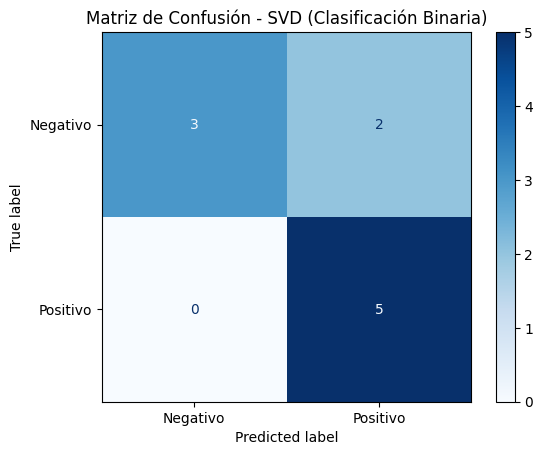

In [30]:

# Configuración
k = 5
umbral = 3500
y_true = [1 if label == 'carlos' else 0 for label in labels]
ref = X[15].reshape(100, 100)

# Evaluación con imagen fija SVD
y_pred_svd = []
tiempo_total = 0
mem_total = 0

for i in range(len(xtest)):
    img = xtest[i].reshape(100, 100)

    tracemalloc.start()
    inicio = time.time()
    distancia, _ = comparar_con_svd(img, ref, X_mean, Vt, k, umbral)
    tiempo_total += time.time() - inicio
    mem_total += tracemalloc.get_traced_memory()[1] / 1024
    tracemalloc.stop()

    pred = 1 if distancia < umbral else 0
    y_pred_svd.append(pred)

# Métricas SVD
cm_svd = confusion_matrix(y_true, y_pred_svd)
acc_svd = accuracy_score(y_true, y_pred_svd)
varianza_svd = np.sum(S[:k]**2) / np.sum(S**2)

print(f"\n--- SVD ---")
print(f"Accuracy: {acc_svd:.2f}")
print(f"Tiempo total: {tiempo_total:.2f} s")
print(f"Memoria total aprox: {mem_total:.2f} KB")
print(f"Varianza explicada (k={k}): {varianza_svd:.4f}")

disp = ConfusionMatrixDisplay(cm_svd, display_labels=["Negativo", "Positivo"])
disp.plot(cmap="Blues")
plt.title("Matriz de Confusión - SVD (Clasificación Binaria)")
plt.show()





Distancia (PCA, k=5): 2717.35
✅ Probablemente la MISMA persona
Distancia (PCA, k=5): 2282.83
✅ Probablemente la MISMA persona
Distancia (PCA, k=5): 2194.60
✅ Probablemente la MISMA persona
Distancia (PCA, k=5): 1920.71
✅ Probablemente la MISMA persona
Distancia (PCA, k=5): 2003.11
✅ Probablemente la MISMA persona
Distancia (PCA, k=5): 3245.33
✅ Probablemente la MISMA persona
Distancia (PCA, k=5): 5796.18
❌ Probablemente NO es la misma persona
Distancia (PCA, k=5): 5546.60
❌ Probablemente NO es la misma persona
Distancia (PCA, k=5): 3150.67
✅ Probablemente la MISMA persona
Distancia (PCA, k=5): 4198.75
❌ Probablemente NO es la misma persona

--- PCA ---
Accuracy: 0.80
Tiempo total: 0.05 s
Memoria total aprox: 3015.55 KB
Varianza explicada (k=5): 0.9998


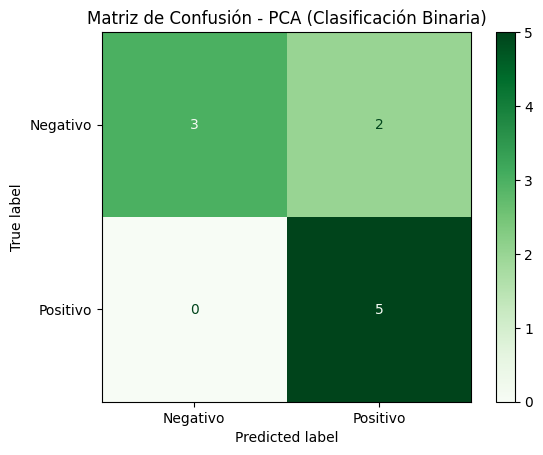

In [32]:
# Configuración
k = 5
umbral = 3500
y_true = [1 if label == 'carlos' else 0 for label in labels]
ref = X[15].reshape(100, 100)

# Evaluación con imagen fija PCA
y_pred_pca = []
tiempo_total = 0
mem_total = 0

for i in range(len(xtest)):
    img = xtest[i].reshape(100, 100)

    tracemalloc.start()
    inicio = time.time()
    distancia, _ = comparar_con_pca(img, ref, X_mean, pca, k, umbral)
    tiempo_total += time.time() - inicio
    mem_total += tracemalloc.get_traced_memory()[1] / 1024
    tracemalloc.stop()

    pred = 1 if distancia < umbral else 0
    y_pred_pca.append(pred)

# Métricas PCA
cm_pca = confusion_matrix(y_true, y_pred_pca)
acc_pca = accuracy_score(y_true, y_pred_pca)
varianza_pca = np.sum(pca.explained_variance_ratio_[:k])

print(f"\n--- PCA ---")
print(f"Accuracy: {acc_pca:.2f}")
print(f"Tiempo total: {tiempo_total:.2f} s")
print(f"Memoria total aprox: {mem_total:.2f} KB")
print(f"Varianza explicada (k={k}): {varianza_pca:.4f}")

disp = ConfusionMatrixDisplay(cm_pca, display_labels=["Negativo", "Positivo"])
disp.plot(cmap="Greens")
plt.title("Matriz de Confusión - PCA (Clasificación Binaria)")
plt.show()
